In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src,Plots

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
# set true model parameters
a_true = 1.2 # at bifurcation unstable branch
m_true = 0.45
n0 = 0.45
w0 = 1.0
M = 100 # number of measurements
noise = 0.5

# create parameter object for trial
hprm = Hyperprm(w0, n0, a_true, m_true, M, noise);

## fixed time window, observe from t=0

In [3]:
# observation time window fixed
t_fixed = true

true

### infer a,m

In [4]:
# infer a,m parameter
prm_keys = [:a, :m];

In [5]:
# inverse uq and practical identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], t_fixed=t_fixed,n0=n0,w0=w0)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

### analyze plots

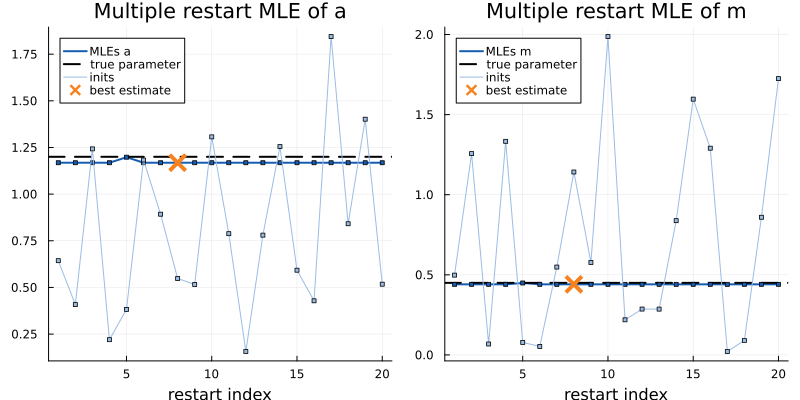

In [6]:
r.plot_mles

In [7]:
r.cor

2×2 Matrix{Float64}:
 1.0       0.999181
 0.999181  1.0

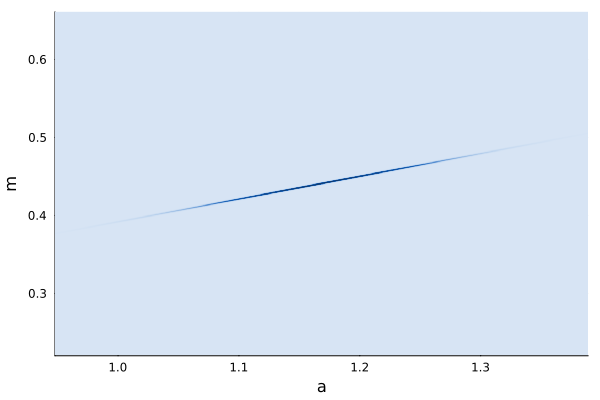

In [8]:
r.gaussian_heatmap

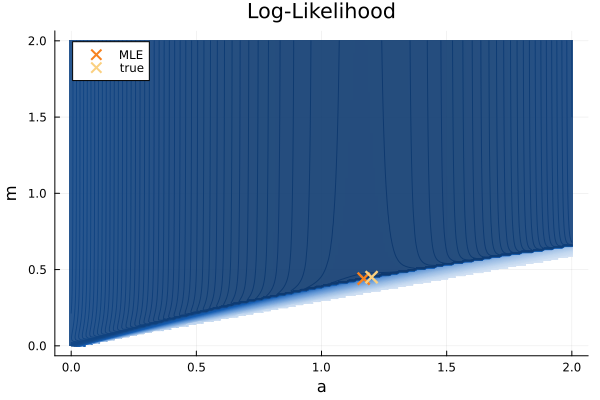

In [9]:
analyze_ll(r.mle,prm_keys, hprm,-1000, t_fixed=t_fixed)
scatter!([a_true],[m_true], markershape=:x, markerstrokewidth=3, markersize=6, color="#FAD080", label="true")

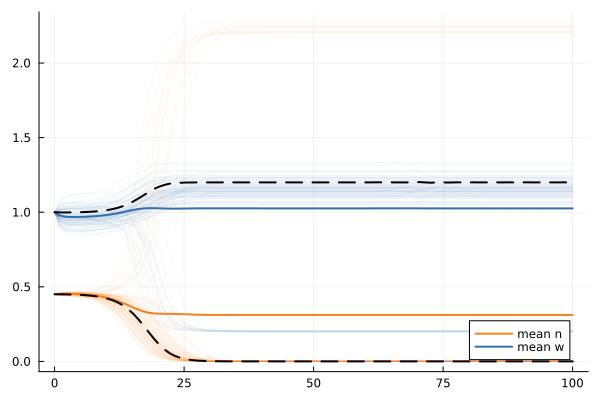

In [10]:
rf.trajectories

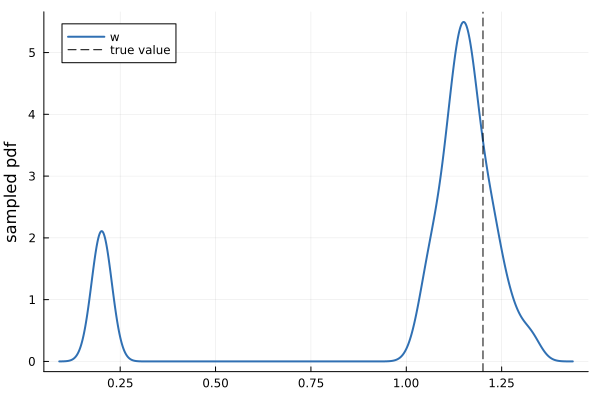

In [12]:
rf.sample_dens_w

### infer a

In [19]:
prm_keys= [:a];

In [20]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], t_fixed=t_fixed, n0=n0, w0=w0)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

In [21]:
r.cov

1×1 Matrix{Float64}:
 2.352892066351317e-5

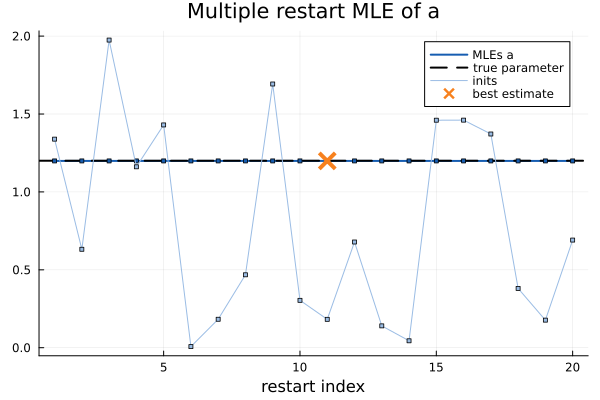

In [22]:
r.plot_mles

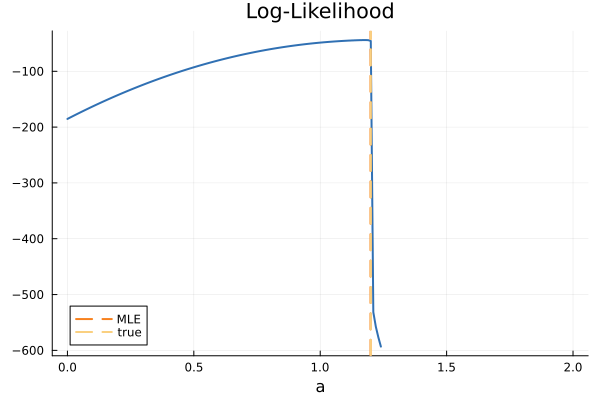

In [23]:
analyze_ll(r.mle, prm_keys, hprm, -600, t_fixed=t_fixed)
vline!([a_true], linestyle=:dash, linewidth=2, color=:"#FAD080", label="true")

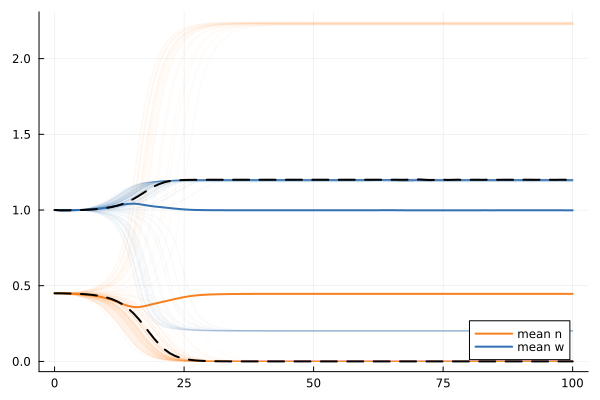

In [24]:
rf.trajectories

## fixed time window, observe stable state only

In [25]:
# observation time window fixed
t_fixed = true

# observations in stable state only
obs_late = true
t_obs=100.0
t_end = 200.0;

### infer a

In [26]:
# infer a,m parameter
prm_keys = [:a];

In [27]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed, obs_late=obs_late, t_end=t_end, t_obs=t_obs)

# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], t_fixed=t_fixed, t_end=t_end, n0=n0,w0=w0)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

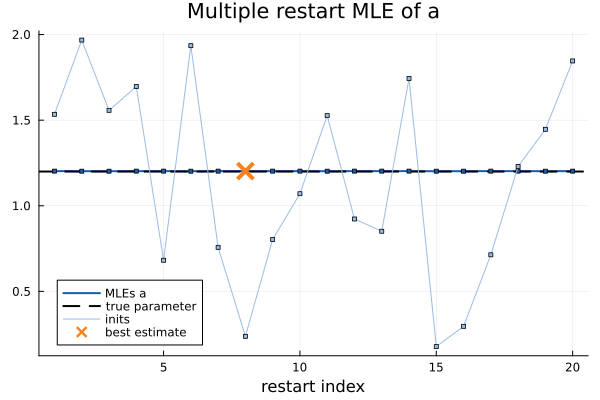

In [28]:
r.plot_mles

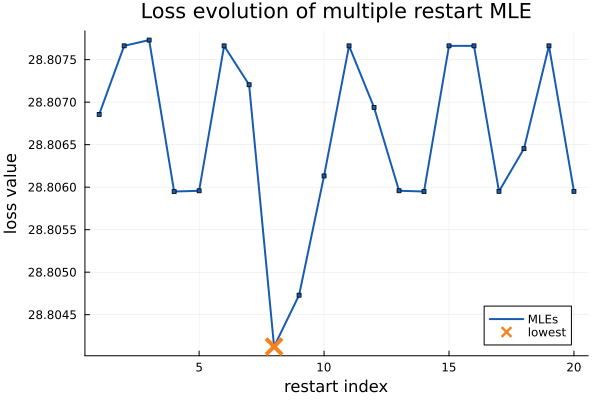

In [29]:
r.plot_losses

In [30]:
r.cor

1×1 Matrix{Float64}:
 1.0

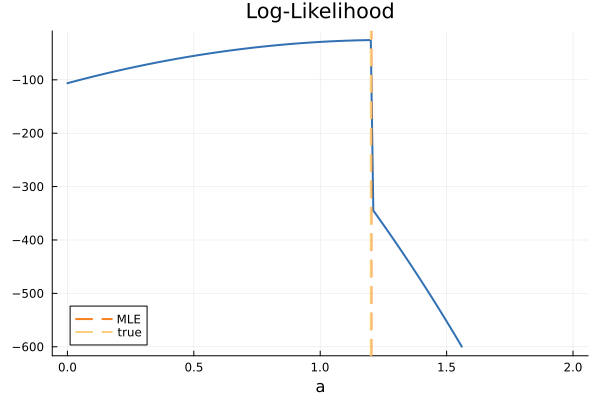

In [31]:
analyze_ll(r.mle, prm_keys, hprm, -600, t_fixed=t_fixed, obs_late=obs_late,t_end=t_end)
vline!([a_true], linestyle=:dash, linewidth=2, color=:"#FAD080", label="true")

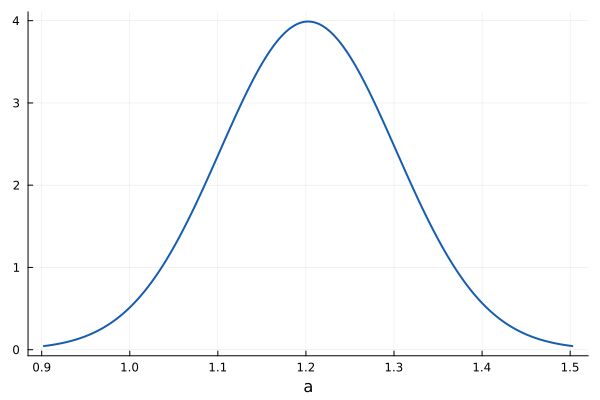

In [32]:
r.gaussian_surface

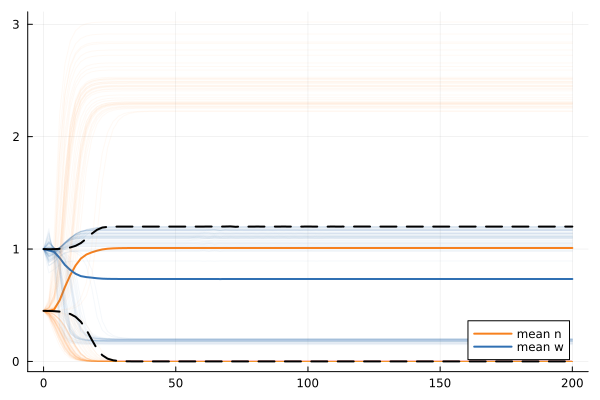

In [33]:
rf.trajectories

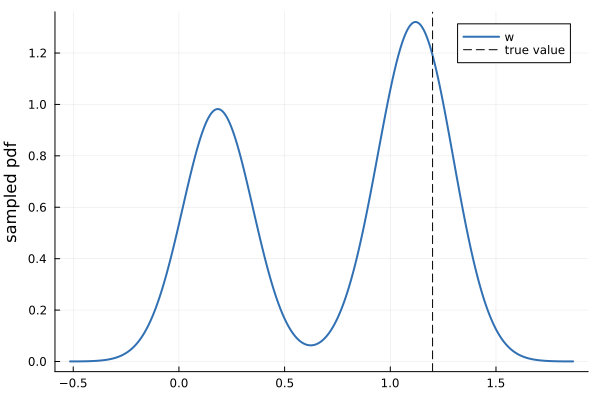

In [34]:
rf.sample_dens_w